**Causal Inference for Policy Evaluation (HS 2021)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 2 - Unconfoundedness


---

![](./Cgraph.JPG)

**Key steps of causal policy evaluation**

1. Set up a research design to study a key effect of interest (i.e. choose an identification strategy) 

2. Discuss the identifying assumptions in context

3. Prepare the data for analysis (session 1)

4. Produce and interpret relevant descriptive statistics, and provide supportive evidence for the validity of identifying assumptions

5. Estimate causal effects of interest 

6. Present and interpret the results meaningfully 


**Key ingredients for a selection on observables design:**

* Treatment assignment an self-selection into treatment are well understood (institutional knowledge, theory)
* A rich dataset containing all relevant confounders
* Sufficiently large number of nontreated observations
* Common support in the covariate distributions (no perfect predictor of the treatment status)


## Application: What Did All the Money Do? On the General Ineffectiveness of Recent West German Labour Market Programmes
**Conny Wunsch and Michael Lechner, Kyklos 2008**


***
## 1. Introduction



* What is the research question?

* Why is this question of interest?

* What are the treatment(s) and the outcome(s)? 

* How is the control group defined?

* Why would comparing the average outcomes of the treated and control groups potentially result in a biased treatment effect estimate? What is the endogeneity problem?


***

## 2. Setup and Data

### Program specifics

* Evaluate the effect of an **online application coaching program for unemployed workers** on their employment outcomes.
* The course is full time and can only be started within the first month of unemployment.
* It lasts for **1 month**.
* Any worker can voluntarily participate, in agreement with their randomly-assigned caseworker. 
* Caseworkers are instructed to encourage older workers, as well as women with lower education to participate. 
* Participation is however mandatory for all workers older than 60.
* The program's capacity is limited each month.

Why is this information important?


### Data

We have representative data on unemployment spells that started in 20XX, with a rich set of observable individual characteristics.


|Variable name| Description|
|:----|:----|
|*id*|Individual identifier|
|*idobs*|Spell ID|
|*date_start*|Start of unemployment spell|
|*date_end*|Spell end|
|*spell*|Unemployment spell|
|*num_spells*|Number of unemployment spells|
|*treat*|Program participation|
|*duration*|Spell duration|
|*employed1y*|Employed within 1 year|
|*sex*|Gender (Female=1)|
|*marits*|Marital status (Married=1)|
|*region*|Region|
|*educ*|Education|
|*insured_earn*|Insured earnings|
|*lastj_occpt*|Occupation last job|
|*lastj_fct*|Function last job|
|*contr_5y*|Months contribution in last 5 years|
|*unempl_r*|Unemployment rate|
|*full_time*|Full time employed last job|
|*swiss*|Swiss citizen|
|*age*|Age|
|*agegr*|Age group|



***

## 3. Identification strategy and assumptions

### Notation

* $D_i \in \{0,1\}$ ... treatment (program participation)
* $Y^*_{0i}$ ... potential outcome under no participation (unemployment duration)
* $Y^*_{1i}$ ... potential outcome under participation
* $Y_{0i}$, $Y_{1i}$  ... observed outcomes

### Effects of interest

* **Average Treatement Effect**: 
$$ATE = {\rm E} [Y^*_{1i} - Y^*_{0i}]$$


* **Average Treatment Effect on the Treated**: 
$$ATET = {\rm E} [Y^*_{1i} - Y^*_{0i}|D_i =1]$$


* **Average Treatment Effect on the Non-Treated:**  
$$ATENT ={\rm E} [Y^*_{1i} - Y^*_{0i}|D_i =0]$$
 


---

### Discussion of identifying assumptions

* Which assumptions are imposed for parametric and semiparametric estimators?

* What do these assumptions mean in words?

*	What could invalidate them? Think of concrete examples or mechanisms.

*	Which arguments or evidence can you provide to support that they hold?



**A1 Stable unit treatment value assumption (SUTVA):**

$Y_i=D_iY^*_{1,i}+(1-D_i)Y^*_{0,i}$

* We assume that there are no spillover effects from treated to non-treated individuals. 

* Participants should not affect the outcomes of non-participants (e.g. no general equilibrium effects).

* Difficult to test and rarely discussed in the literature. An exception: Ferracci et al. (2014). 

* Supporting arguments can be related to the scale of the program.


### *Parametric context*

**A2 Zero conditional mean error:**

$E[U_i|D=D_i,X=X_i]=0$ 

* Main identifying assumption.

* Implies that there are no unobserved variables $U_i$ that are correlated with the treatment conditional on $X$.

* You need to argue that you sufficiently control for all the (observable and unobservable) characteristics that jointly affect $Y_i$ and $D_i$.

The choice of control variables should be guided by 
* large observed differences in covariates between treated and control observations
* institutional knowledge 
* existing theory and literature. 



**A3 Linearity:**

$E[Y_i|D=D_i,X=X_i]=\alpha+\delta D_i+\sum_{k=1}^K\beta_kX_{i,k}$

* You impose a linear relationship between the outcome, the treatment and the $X$. 

* Can be relaxed by more flexible functional forms (polynomials, dummies, interaction terms).


**A4 Effect homogeneity:**

$E[Y^*_{1,i}-Y^*_{0,i}]=\delta = ATE = ATET = ATENT \quad\forall\ i$

* Directly resulting from **A3**.

* You assume the treatment effect is the same for all individuals (participants and non-participants).

### *Non or semi-parametric context*

**A2  Conditional independence assumption (CIA)**

$ Y^*_{1} ,Y^*_{0}\perp D|X $

* Nonparametric equivalent to **A2**

* Treatment is random, i.e. independent of outcomes, conditional on $X$.

* Observe all $X$ that jointly determine the outcome and the treatment (discussed in the lecture).

The assumptions **A3** and **A4** are not necessary.


**A3  Common support (CS)**

$0<Pr(D=1|X=x)<1$

* There are always both treated ($D=1$) and nontreated ($D=0$) with the same $X$.




***
## 4. Empirical Analysis

### Load packages 

In [32]:
# remove old objects from R working space
rm(list=ls())

# Define packages that you need
packages_vector <- c("tidyverse", "haven", "Hmisc", "dplyr", 
                     "tidyr", "stringr", "sandwich", "lmtest", 
                     "jtools", "fBasics", "knitr", "xtable", 
                     "data.table", "stargazer", "AER", "mfx", "expss",
                     "causalweight", "np", "fastDummies")

#install.packages(packages_vector) 
lapply(packages_vector, require, character.only = TRUE) 
(.packages())


# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[1] "fastDummies"  "np"           "causalweight" "ranger"       "expss"       
 [6] "mfx"          "betareg"      "MASS"         "AER"          "car"         
[11] "carData"      "stargazer"    "data.table"   "xtable"       "knitr"       
[16] "fBasics"      "timeSeries"   "timeDate"     "jtools"       "lmtest"      
[21] "zoo"          "sandwich"     "Hmisc"        "Formula"      "survival"    
[26] "lattice"      "haven"        "forcats"      "stringr"      "dplyr"       
[31] "purrr"        "readr"        "tidyr"        "tibble"       "ggplot2"     
[36] "tidyverse"    "stats"        "graphics"     "grDevices"    "utils"       
[41] "datasets"     "methods"      "base"

### Load data

Load the data that we cleaned last week.

In [33]:
# Data for descriptives
load("data_desc.RData")
attach(data_desc)

# Data for regression (omitting reference categories)
load("data_reg.RData")
attach(data_reg)

options(warn=-1)

The following objects are masked from data_reg:

    agegr_2, agegr_3, agegr_4, contr_5y, duration, educ_0, educ_2,
    educ_3, educ_99, employed1y, full_time_0, insured_earn,
    lastj_fct_0, lastj_fct_1, lastj_fct_3, lastj_fct_99, lastj_occpt_1,
    lastj_occpt_10, lastj_occpt_11, lastj_occpt_12, lastj_occpt_14,
    lastj_occpt_15, lastj_occpt_16, lastj_occpt_17, lastj_occpt_18,
    lastj_occpt_19, lastj_occpt_2, lastj_occpt_20, lastj_occpt_21,
    lastj_occpt_22, lastj_occpt_23, lastj_occpt_3, lastj_occpt_4,
    lastj_occpt_5, lastj_occpt_6, lastj_occpt_7, lastj_occpt_8,
    lastj_occpt_9, marits_1, region_1, region_2, region_3, region_4,
    region_5, region_7, sex_1, swiss_0, treat, unempl_r


The following objects are masked from data_desc (pos = 4):

    agegr_1, agegr_2, agegr_3, agegr_4, contr_5y, duration, educ_0,
    educ_1, educ_2, educ_3, educ_99, employed1y, full_time_0,
    full_time_1, insured_earn, lastj_fct_0, lastj_fct_1, lastj_fct_2,
    lastj_fct_3, lastj_fct_99, l

### Application-specific cleaning


On top of the variables available in the dataset, we might want to create some additional variables to include in our specification.

In [34]:
# Generate quarter of entry into unemployment to control for seasonality 
data_reg$quarter <- as.numeric(quarter(data_reg$date_start))
cro(data_reg$quarter)

# Generate categorical dummies (4th quarter omitted here)
data_reg<-dummy_cols(data_reg, select_columns = c("quarter"), 
                     remove_most_frequent_dummy = TRUE)


# save final data set
save(data_reg, xcat_names_reg, xcont_names, file="data_reg_final.RData")

,,#Total
data_reg$quarter,1,4706
,2,3960
,3,4498
,4,5920
,#Total cases,19084


In [35]:
# Define variable inputs for the estimation

# Outcomes
y1 <- as.matrix(data_reg$duration)
y2 <- as.matrix(data_reg$employed1y)

# Treatment
treat <- as.matrix(data_reg$treat)

# Controls
x1 <- as.matrix(dplyr::select(data_reg, 
                              xcat_names_reg, 
                              xcont_names, 
                              starts_with("quarter_")))
x_names<- colnames(x1)

# Inspect data
print("Dimensions of outcome and input vectors")
dim(y1)
dim(y2)
dim(x1)

print("Matrix of covariates")
head(x1)

[1] "Dimensions of outcome and input vectors"


[1] 19084     1

[1] 19084     1

[1] 19084    49

[1] "Matrix of covariates"


sex_1,marits_1,region_1,region_2,region_3,region_4,region_5,region_7,swiss_0,educ_0,...,lastj_fct_99,agegr_2,agegr_3,agegr_4,insured_earn,contr_5y,unempl_r,quarter_1,quarter_2,quarter_3
0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,4368,36,1.3,1,0,0
1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,5579,47,2.1,0,1,0
1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,2710,36,4.7,0,0,0
1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,4896,12,3.2,1,0,0
1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,4896,48,2.1,0,0,1
0,1,0,0,0,0,1,0,1,1,...,1,1,0,0,5370,0,2.8,1,0,0


## 1. Descriptive Statistics

#### Differences in characteristics and outcomes by treatment status

Is there evidence of selection into treatment based on observable characteristics?

* Compare the differences in means across treatment and control groups by regressing the covariates on the treatment variable (t-test). Significantly different?

* Compare the absolute standardized bias. Is it larger than 5%?

$$SB = 100*\frac{E(X|D=1)-E(X|D=0)}{\sqrt{0.5*[Var(X|D=1)+Var(X|D=0)]}}$$



In [36]:
 # a selection of controls
  x_desc<- cbind(insured_earn, contr_5y, unempl_r, sex_1,
                 marits_1, swiss_1, agegr_1, 
                 agegr_2, agegr_3, agegr_4, 
                 educ_0, educ_1, educ_2, educ_3, full_time_1)
  x_desc_names<- colnames(x_desc)
  
  # Define a function estimating the differences in variables across D
  balance_check.model <- function(x){
    
    # Conditional means
    mean_d0 <- mean(x[treat==0])
    mean_d1 <- mean(x[treat==1])
    
    # Variances in subsamples
    var_d0 <- var(x[treat==0])
    var_d1 <- var(x[treat==1])
    
    # Difference in means
    diff_d <- lm(x ~ treat)
    cov <- vcovHC(diff_d, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    # Absolute standardized bias
    sb <- abs((mean_d1-mean_d0)/sqrt((var_d0+var_d1)/2))*100
    
    # Store output as a list 
    list(mean_d0 = mean_d0, 
         mean_d1 = mean_d1,
         diff_d = diff_d$coefficients[2], 
         robust.se = robust.se[2], 
         pval = 2*pnorm(-abs(diff_d$coefficients[2]/robust.se[2])),
         SB = sb)             
  }
  
  # Apply to selection (MARGIN = 2 to loop over columns)
  diff_output <- apply(X = x_desc, MARGIN = 2, FUN = balance_check.model)
  # Convert output in list format into a data frame 
  diff_output<-as.data.frame(rbindlist(diff_output))
  
 # Add number of observations (don't forget the comma!)
  obs <- c(nrow(data_reg[data_desc$treat==0,]), 
           nrow(data_desc[data_desc$treat==1,]), 
           NA, NA, NA, NA)
  diff_output <- rbind(diff_output, obs)
  
  # Display in desired format
  rownames(diff_output)<- c(x_desc_names, "Observations")
  colnames(diff_output)<- c("E(X|D=0)", "E(X|D=1)", "Difference", "s.e.", 
                            "p-value", "Abs. SB")
  print("Difference in means by treatment status and standardized bias")
   
  xtable(diff_output, digits=3) # (for latex or Jupyter)
  

[1] "Difference in means by treatment status and standardized bias"


,E(X|D=0),E(X|D=1),Difference,s.e.,p-value,Abs. SB
insured_earn,4937.040,4724.427,-212.613,31.414,0.000,9.826
contr_5y,38.536,30.088,-8.449,0.292,0.000,42.208
unempl_r,2.723,2.757,0.034,0.018,0.060,2.729
sex_1,0.401,0.474,0.073,0.007,0.000,14.703
marits_1,0.451,0.352,-0.099,0.007,0.000,20.313
swiss_1,0.571,0.571,0.000,0.007,0.975,0.046
agegr_1,0.320,0.338,0.018,0.007,0.009,3.791
agegr_2,0.296,0.291,-0.005,0.007,0.431,1.144
agegr_3,0.238,0.225,-0.012,0.006,0.041,2.959
agegr_4,0.145,0.145,-0.000,0.005,0.981,0.035


---

## 2. Parametric estimation: Linear regression analysis


### Effect on unemployment duration

We estimate the following specification using OLS 

$$Y_i=\alpha+\delta D_i+\sum_{k=1}^K\beta_kX_{i,k}+U_i$$

where $Y_i$ is the outcome of interest, here the unemployment duration.



In [37]:
# Linear model (OLS)
lm.model.dur <- lm(y1 ~ treat + x1)

# summ command in the jtools package directly calculates heteroskedasticity robust SEs
lm.model.out.dur <-summ(lm.model.dur, robust = "HC1")
lm.model.out.dur

# store robust standard error
robust.se.dur <- lm.model.out.dur$coeftable[,2]

MODEL INFO:
Observations: 19084
Dependent Variable: y1
Type: OLS linear regression 

MODEL FIT:
F(50,19033) = 80.61, p = 0.00
R² = 0.17
Adj. R² = 0.17 

Standard errors: Robust, type = HC1
--------------------------------------------------------
                            Est.    S.E.   t val.      p
---------------------- --------- ------- -------- ------
(Intercept)               121.79    6.14    19.84   0.00
treat                    -103.28    1.95   -52.92   0.00
x1sex_1                    -2.18    2.58    -0.84   0.40
x1marits_1                 14.11    2.51     5.63   0.00
x1region_1                -13.76    6.04    -2.28   0.02
x1region_2                -13.12    3.39    -3.87   0.00
x1region_3                -14.66    4.10    -3.58   0.00
x1region_4                -25.49    4.73    -5.39   0.00
x1region_5                 -7.92    3.60    -2.20   0.03
x1region_7                  5.57   10.01     0.56   0.58
x1swiss_0                  16.12    2.50     6.46   0.00
x1educ_0     

### Effect on the probability of finding a job within one year after program start

Due to the binary nature of the variable, we estimate a probit model:

$$Pr(Y = 1|X = x) = \Phi ( \alpha + \delta D_i +\sum_{k=1}^K\beta_kX_{i,k})$$

and compute the corresponding marginal effects at the mean value of other observable characteristics.

In [38]:
# Probit model 
probit.model <- glm(y2 ~ treat + x1, 
                    family = binomial(link = "probit") )

probit.model.out <-summ(probit.model, , robust = "HC1")
robust.se.probit <- probit.model.out$coeftable[,2]

# Marginal effect
probit.model.me <- probitmfx(y2 ~ treat + x1, data=data_reg, 
                            atmean = TRUE, robust = TRUE)

probit.model.me

Call:
probitmfx(formula = y2 ~ treat + x1, data = data_reg, atmean = TRUE, 
    robust = TRUE)

Marginal Effects:
                       dF/dx   Std. Err.        z     P>|z|    
treat             1.5107e-01  3.8391e-03  39.3505 < 2.2e-16 ***
x1sex_1          -4.3522e-03  3.7286e-03  -1.1672 0.2431102    
x1marits_1       -1.6755e-02  3.5651e-03  -4.6997 2.606e-06 ***
x1region_1        1.0590e-02  7.1691e-03   1.4772 0.1396138    
x1region_2        1.4107e-02  4.2329e-03   3.3326 0.0008604 ***
x1region_3        1.0553e-02  4.9224e-03   2.1439 0.0320372 *  
x1region_4        2.3955e-02  4.7659e-03   5.0264 4.998e-07 ***
x1region_5        7.3112e-03  4.6916e-03   1.5584 0.1191499    
x1region_7       -6.2289e-03  1.2619e-02  -0.4936 0.6215931    
x1swiss_0        -1.6368e-02  3.6130e-03  -4.5304 5.888e-06 ***
x1educ_0          1.1592e-03  4.4164e-03   0.2625 0.7929521    
x1educ_2          2.0491e-02  5.5987e-03   3.6599 0.0002523 ***
x1educ_3          9.9470e-03  4.5711e-03   2.1761 0.02

In [39]:
# Collect effects estimates in a table
stargazer(lm.model.dur, probit.model.me$fit, 
          coef = list(NULL, probit.model.me$mfxest[,1]), 
          se=list(robust.se.dur, probit.model.me$mfxest[,2]), 
          keep=c("treat"), 
          keep.stat = c("n", "rsq"), 
          type ="text", 
          column.labels=c("Duration","Emply1"), 
          align=TRUE, 
          dep.var.labels.include = FALSE)


                 Dependent variable:     
             ----------------------------
                   OLS          probit   
                Duration        Emply1   
                   (1)           (2)     
-----------------------------------------
treat          -103.276***     0.151***  
                 (1.951)       (0.004)   
                                         
-----------------------------------------
Observations     19,084         19,084   
R2                0.175                  
Note:         *p<0.1; **p<0.05; ***p<0.01


Could we relax the assumption of effect homogeneity here?

---

## 3. Semiparametric estimation: General procedure

1. Choose covariates to enter in the p-score model 
2. Estimate the treatment probability $Pr(D = 1|X = x)$ parametrically using a probit or logit model.
3. Predict the treatment probability, i.e. compute the propensity score (p-score), $p(X_i)$.
4. Check for overlap (common support) in p-score across treated and control groups, and possibly trim observations with no overlap.
5. Choose an effect of interest (e.g. ATET) and a semiparametric estimator (e.g. IPW, nearest-neighbour matching, radius matching, etc.), and compute the corresponding weights using the p-score.
6. For inference, bootstrap everything (often directly available as an option in packages).
7. Check for changes in considered population and balancedness in covariates.


### 1. Choose covariates to enter in the propensity score model 

* Need to understand the mechanisms that determine selection into treatment (see discussion on identifying assumptions).

* Once you have gathered the relevant covariates, can use omitted variable tests or machine learning methods to specify full propensity score model. 

* Can make it more flexible, e.g. by including interaction terms.

* This can be an iterative process.

Here, use covariates as they are and go straight to step 2.


### 2. Estimate the propensity score model 

Parametrically, using a probit model

$$Pr(D=1|X=x)=\Phi(\alpha+\sum_{k=1} ^K\beta_kX_{k,i})$$ 

In [40]:
# Estimate the p-score model
pscore.model <- glm(treat ~ x1, family = binomial(link = "probit"))
summ(pscore.model, robust = "HC1")

MODEL INFO:
Observations: 19084
Dependent Variable: treat
Type: Generalized linear model
  Family: binomial 
  Link function: probit 

MODEL FIT:
<U+03C7>²(49) = 1474.53, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.10
Pseudo-R² (McFadden) = 0.06
AIC = 24949.22, BIC = 25342.05 

Standard errors: Robust, type = HC1
-----------------------------------------------------
                          Est.   S.E.   z val.      p
---------------------- ------- ------ -------- ------
(Intercept)               0.27   0.05     4.94   0.00
x1sex_1                   0.15   0.02     6.33   0.00
x1marits_1               -0.31   0.02   -14.75   0.00
x1region_1                0.08   0.05     1.48   0.14
x1region_2               -0.04   0.03    -1.10   0.27
x1region_3               -0.00   0.04    -0.13   0.89
x1region_4                0.02   0.04     0.51   0.61
x1region_5               -0.05   0.03    -1.41   0.16
x1region_7               -0.14   0.08    -1.78   0.08
x1swiss_0                -0.02   0.02    -0.

### 3. Predict the treatment probability, i.e. compute the p-score, $p(X_i)$ 

In [41]:
data_reg$pscore <- pscore.model$fitted.values 
summary(data_reg$pscore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1593  0.3535  0.4511  0.4585  0.5585  0.8654 

### 4. Check for overlap (common support) in p-score across treated and control groups

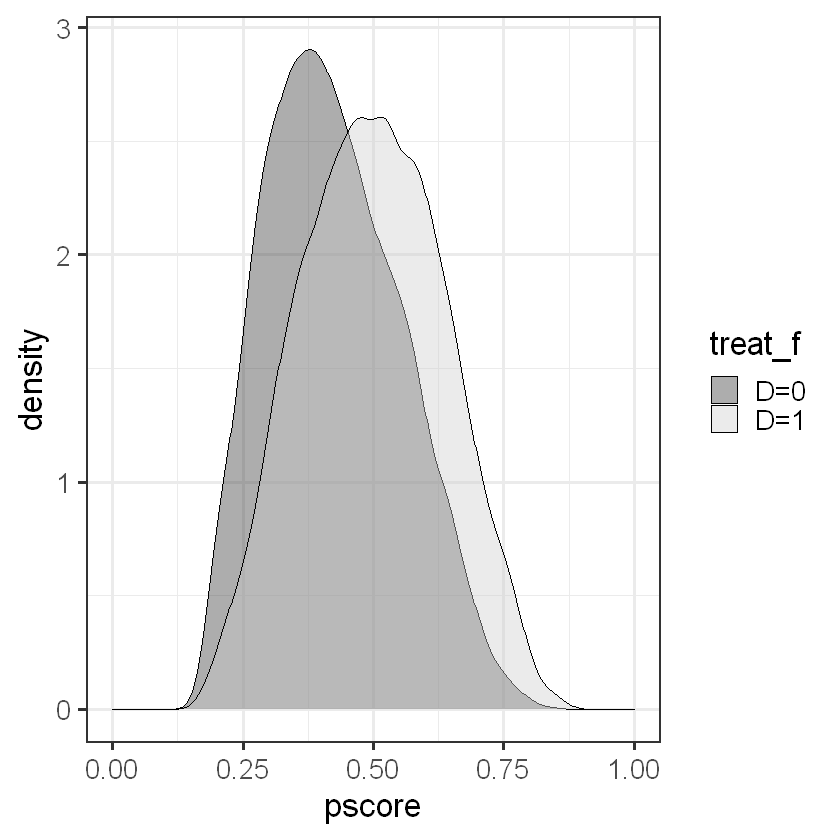

In [42]:
# Create a factor variable for treatment status for the plot
data_reg$treat_f <- factor(treat, 
                           levels = c(0,1), 
                           label = c("D=0", "D=1")) 

# Density plot for the propensity score by treatment status
ggplot(data_reg, aes(x = pscore, fill = treat_f)) + 
    geom_density(alpha=0.4) + 
    scale_fill_grey()+ 
    theme_bw(base_size = 20) +
    xlim(0, 1)

### Enforce common support: Trim observations with no overlap

When estimating the ATET, we want to keep treated observations that have comparable controls. 

In [43]:
print("Sample size before imposing common support ")
nrow(data_reg)

[1] "Sample size before imposing common support "


[1] 19084

In [44]:
# Trim treated observations with a pscore above the maximum of the controls
pscore_max0 <-max(data_reg$pscore[treat==0])

print("Maximum p-score in control group")
pscore_max0

[1] "Maximum p-score in control group"


[1] 0.850624

In [45]:
# Dummy for being in estimation sample 
insample<- ifelse(data_reg$pscore <= pscore_max0 # trimming for ATET
                  & data_reg$pscore != 0 # non-treatment not perfectly predicted
                  & data_reg$pscore != 1 # treatment not perfectly predicted
                  & !is.na(data_reg$pscore) # p-score non-missing 
                  , 1, 0) # if all conditions true = 1 

print("Sample size after imposing common support ")
sum(insample)

[1] "Sample size after imposing common support "


[1] 19076

Note: If estimate ATE, you should impose additional trimming on the lower end of the p-score distribution.

In [46]:
# Trim control observations with pscore below the minimum of the treated 
pscore_min1 <-min(data_reg$pscore[treat==1])

print("Minimum p-score in treated group")
pscore_min1

# Add the following condition for the estimation sample
# & ((data_reg$pscore>pscore_min1) | (data_reg$pscore<pscore_max0)) 

[1] "Minimum p-score in treated group"


[1] 0.1687955

In [47]:
# Store a new data frame with the relevant sample 
data_ipw <- dplyr::filter(data_reg, insample ==1)

In [48]:
# redefine variables for the IPW estimation sample 
y1_ipw <- y1[insample==1]
treat_ipw <- treat[insample==1]
x1_ipw <- x1[insample==1,] # need comma here, matrix and not vector

The population might change if a lot of observations are dropped, so check again how the characteristics of your estimation sample compare to the initial sample.

### 5. Choose the effect of interest and a semiparametric estimator, and compute the corresponding weights using the p-score

#### Say we want to estimate the average treatment effect on the treated (ATET)

$$ \text{ATET} = \sum_{i=1}^N\frac{D_iY_i}{\sum_{i=1}^N D_i} - \sum_{i=1}^N\frac{(1-D_i)w(X_i)Y_i}{\sum_{i=1}^N(1-D_i)w(X_i)}$$

The first term is directly observed, we want to estimate the second one (counterfactual). 

Reweigh the control group to be like the treated group. 

#### .... using inverse probability weighting (IPW)

Since we have the p-score, we can compute the IPW weights for the ATET

$$w(X_i)=\frac{p(X_i)}{1-p(X_i)}$$

First, we compute the IPW estimator manually for illustration.

In [49]:
# Create the weights
data_ipw$weight[treat_ipw==1] <- 1
data_ipw$weight[treat_ipw==0] <- data_ipw$pscore[treat_ipw==0]/
                                (1-data_ipw$pscore)[treat_ipw==0]
weight <- data_ipw$weight

In [50]:
# Compute the ATET
Y1<-sum(y1_ipw*treat_ipw)/sum(treat_ipw)
Y0<-sum(y1_ipw*(1-treat_ipw)*weight)/sum((1-treat_ipw)*weight)
ipw_atet_manual <- Y1-Y0

print("Effect on unemployment duration based on IPW (ATET)")
ipw_atet_manual

[1] "Effect on unemployment duration based on IPW (ATET)"


[1] -97.63518

Remarks

* Weights can become very large if $1 - p(X_i)$ is very small, which implies that these control observations have a strong impact on the estimate.
* Trimming large weights (define maximum acceptable weight) improves the stability of the estimate. 
* Inference is done using bootstrapping (e.g. manually, using a function as created in Session 1). 


Fortunately, the `causalweight` package does some of this automatically (but a bit of a black box, e.g. does not show you common support plots). 
* Can estimate ATE or ATET
* P-score trimming can be specified as well depending on the estimated effect
    * If estimate ATE (option `ATET = FALSE` is specified), observations with $Pr(D=1|X)<trim$ or $Pr(D=1|X)>(1-trim)$ are dropped (symmetric trimming based on specified `trim` value).
    * If estimate ATET (option `ATET = TRUE` is speficied), observations with $Pr(D=1|X)>(1-trim)$ are dropped.
    * Can trim manually and implement the command on the trimmed sample. 
* Bootstrap is done within the package (can be clustered).
* For more details, see 
    https://cran.r-project.org/web/packages/causalweight/causalweight.pdf


In [51]:
# IPW - Estimating the ATET based on the causalweight package
ipw_atet <- treatweight(y = y1, # take initial data 
                        d = treat, 
                        x = x1, 
                        ATET = TRUE, # if = FALSE, estimates ATE (default)
                        trim = (1-pscore_max0), # depends on estimated effect
                        boot = 2) # number of bootstrap replications
ipw_atet

$effect
[1] -97.63518

$se
[1] 1.126381

$pval
[1] 0

$y1
[1] 103.1038

$y0
[1] 200.739

$ntrimmed
[1] 8

### 6. For inference, bootstrap everything

Just ran it with 2 replication as an example (minimum for the package to work), because it takes a while. 

Rerun the code above, specifying a higher number of bootstrap replications (e.g. 199) and see for yourself. 

### 7. Check for changes in estimation sample and balancedness in covariates after reweighting

Add the `weight` option in the computation of the difference.

In [52]:
# Define a vector of covariates (manual IPW sample)
x_sel <- as.matrix(dplyr::select(data_ipw, sex_1, marits_1, 
                                 educ_0, educ_2, educ_3, 
                                 agegr_2, agegr_3, agegr_4, 
                                 swiss_0))
x_sel_names <- colnames(x_sel)

# Define a function estimating the differences 
balanced.model.weight <- function(x){
    
    # weighted diff
    weighted_diff <- lm(x[insample==1] ~ treat_ipw, # specify correct sample!
                        weight=data_ipw$weight) # specify weights!
    cov <- vcovHC(weighted_diff, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    # weighted SB
    var_d1 <-var(x[treat_ipw==1])
    w_var_d0 <-wtd.var(x, weights=data_ipw$weight) # weighted variance function from Hmisc package
    w_sb<-abs((weighted_diff$coefficients[2])/sqrt((w_var_d0+var_d1)/2))*100
    
    list(diff = weighted_diff$coefficients[2], 
        robust.se = robust.se[2], 
        pval = 2*pnorm(-abs(weighted_diff$coefficients[2]/robust.se[2])),
        SB=w_sb)

}

# Apply to selection (MARGIN = 2 to loop over columns)
diff_output <- apply(X = x_sel, MARGIN = 2, FUN = balanced.model.weight)
diff_output<-as.data.frame(rbindlist(diff_output))
obs <- c(nrow(x_sel), NA, NA, NA)
diff_output <- rbind(diff_output, obs)

# Table
rownames(diff_output)<- c(x_sel_names, "Observations")
print("Differences in X between control and treatment group after reweighting")
xtable(diff_output, digits=3)

[1] "Differences in X between control and treatment group after reweighting"


,diff,robust.se,pval,SB
sex_1,0.012,0.008,0.116,2.462
marits_1,-0.011,0.008,0.156,2.284
educ_0,-0.004,0.007,0.516,1.018
educ_2,0.002,0.003,0.538,0.937
educ_3,0.001,0.006,0.899,0.193
agegr_2,-0.002,0.007,0.750,0.502
agegr_3,-0.004,0.007,0.541,0.974
agegr_4,-0.009,0.006,0.107,2.597
swiss_0,-0.001,0.008,0.936,0.126
Observations,19076.000,,,


### Another estimator: Radius matching 

In this case, the weights for the ATET are defined as 

$$w(X_i)=\sum_{j:D_j=1}\frac{\underline{1}(|p(X_j)-p(X_i)|<r)}{|p(X_j)-p(X_i)|}\Big/\sum_{k:D_k=0}\frac{\underline{1}(|p(X_j)-p(X_k)|<r)}{|p(X_j)-p(X_k)|}$$

The estimator uses all control observations with a p-score within a chosen radius $r$.

The `radiusmatching` package by Huber et al. (2015) additionally applies some bias correction and is doubly robust (see lecture slides). To download the package, go to https://www.alexandria.unisg.ch/218871/

Package options:
* Specify the number of bootstrap replications (again, takes a while). 
* The radius is defined as a percentage of the largest NN p-score difference: 
    * For the default options `radius=3` and `quantile=0.9` this implies a radius of 3 times the 0.9th quantile of the largest NN p-score difference. A quantile of 1 would correspond to the maximum distance.
* Biascorrection can be performed - the estimator becomes doubly robust.

In [60]:
# LOAD FUNCTIONS for radiusmatching (should be stored in the working directory)
source("radiusmatch/radiusmatch.R")
source("radiusmatch/radiusatet.R")
source("radiusmatch/inferenceweights.R")
source("radiusmatch/inferenceweights2.R")

In [53]:
# Applying the radiusmatching package to the initial sample (data_reg)

rmatch_atet <- radiusmatch(y=y1, d=treat, x=x1, 
                           biascorr=1, # linear bias correction
                           ynonbin = 1, # outcome non-binary - relevant for bias correction (OLS, logit)
                           commonsup = 1, # impose common support (depends on type of estimator)
                           radius = 3, # multiplier for radius
                           quantile = 0.9, # quantile of the distances in pair matching
                           estimand ="ATET", # also ATE, ATENT
                           boot=1) # number of bootstrap replications

print("Effect on unemployment duration based on radiusmatching (ATET)")
rmatch_atet$effect
print("bootstrapped S.E.")
rmatch_atet$se.boot
# NA if only 1 replication

[1] "Effect on unemployment duration based on radiusmatching (ATET)"


[1] -98.14677

[1] "bootstrapped S.E."


[1] NA

***

## Extension : monthly effects

Going back to parametric estimation, we estimate the effects on the individual's probability of finding a job in a specific month after program start (up to 24 months after).

### (1) Define monthly employment outcomes


In [54]:
# Set maximum horizon to look at after start of unemployment, 24 months
maxdur <- 24

# Matrix with as many rows as observations, and as many columns as months in horizon 
emp <- matrix(0, nrow=nrow(data_reg), ncol=(maxdur))

# Name the columns for each month
emp_list <- paste("emp", 1:maxdur, sep="_")
colnames(emp) <- emp_list

# Replace i^th column = 1 if exited unemployment in month i
for (i in 1:maxdur) {
  emp[,i] = ifelse(data_reg$date_end < data_reg$date_start + 30*i & 
                   data_reg$date_end >= data_reg$date_start + 30*(i-1), 1, 0)
}

# Bind as data frame
emp <- as.data.frame(emp, treat)
data_reg <- cbind(data_reg, emp)

head(emp)

,emp_1,emp_2,emp_3,emp_4,emp_5,emp_6,emp_7,emp_8,emp_9,emp_10,...,emp_15,emp_16,emp_17,emp_18,emp_19,emp_20,emp_21,emp_22,emp_23,emp_24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
X0.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
X1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1.1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1.2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X1.3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### (2) Plot monthly exit rates by treatment status

In [55]:
# Create frame with relevant elements for plot

# Month of exit
month <- rep(1:maxdur)

# Average exit rate by treatment status
emp_monthly_treat <- apply(t(emp[treat==1,]),1,mean)
emp_monthly_contr <- apply(t(emp[treat==0,]),1,mean)

# Bind together, along with treatment status dummy
emp_monthly_treat <- cbind(emp_monthly_treat, month, rep(1, times=maxdur))
emp_monthly_contr <- cbind(emp_monthly_contr, month, rep(0, times=maxdur))
emp_monthly <- rbind(emp_monthly_contr, emp_monthly_treat)

# Name columns and display
colnames(emp_monthly) <- c("emp_rate", "month", "treat")
emp_monthly <- as.data.frame(emp_monthly)
emp_monthly

,emp_rate,month,treat
,<dbl>,<dbl>,<dbl>
emp_1,0.0531153251,1,0
emp_2,0.1210332817,2,0
emp_3,0.1309984520,3,0
emp_4,0.1106811146,4,0
emp_5,0.0860100619,5,0
emp_6,0.0720781734,6,0
emp_7,0.0571787926,7,0
emp_8,0.0460526316,8,0
emp_9,0.0397639319,9,0


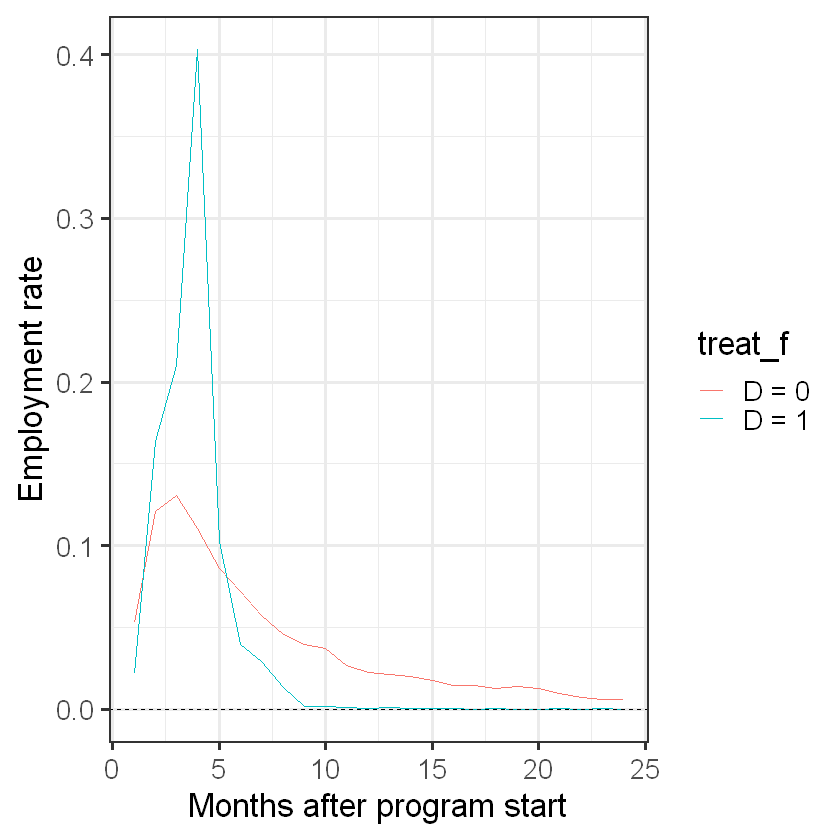

In [56]:
# Create a factor variable for treatment status for the plot
emp_monthly$treat_f <- factor(emp_monthly$treat, 
                                  levels = c(0,1), 
                                  label = c("D = 0", 
                                            "D = 1")) 
ggplot() +
  geom_line(data = emp_monthly, aes(x = month, y = emp_rate, 
                                    group=treat_f, color=treat_f)) +
  theme_bw(base_size = 20) +
  ylab("Exit rate") +
  xlab("Months after program start") +
  geom_hline(yintercept = 0, linetype="dashed") 

### (3) Estimate monthly effects (OLS)

In [57]:
# Define a function to regress exit rates in a given month y 
reg_monthly <- function(y) {
  out <- lm(y ~ treat + x1)
  out2 <- coeftest(out, vcov = vcovHC(out))
  list(effect=out2[2,1], se=out2[2,2])
}

In [58]:
# Loop regression over months 
reg_monthly_out <- apply(emp, 2, reg_monthly)

# Create a frame for the plot 
reg_monthly_out2 <- rbindlist(reg_monthly_out)

# Add month to plot frame 
reg_monthly_out2$month <- rep(1:maxdur)

# Compute confidence intervals and dots marking significant effects
reg_monthly_out2$cil <- reg_monthly_out2$effect - 1.96*reg_monthly_out2$se
reg_monthly_out2$cih <- reg_monthly_out2$effect + 1.96*reg_monthly_out2$se
reg_monthly_out2$sig <- ifelse(abs(reg_monthly_out2$effect)
                          /reg_monthly_out2$se>1.64, 
                          reg_monthly_out2$effect, NA)


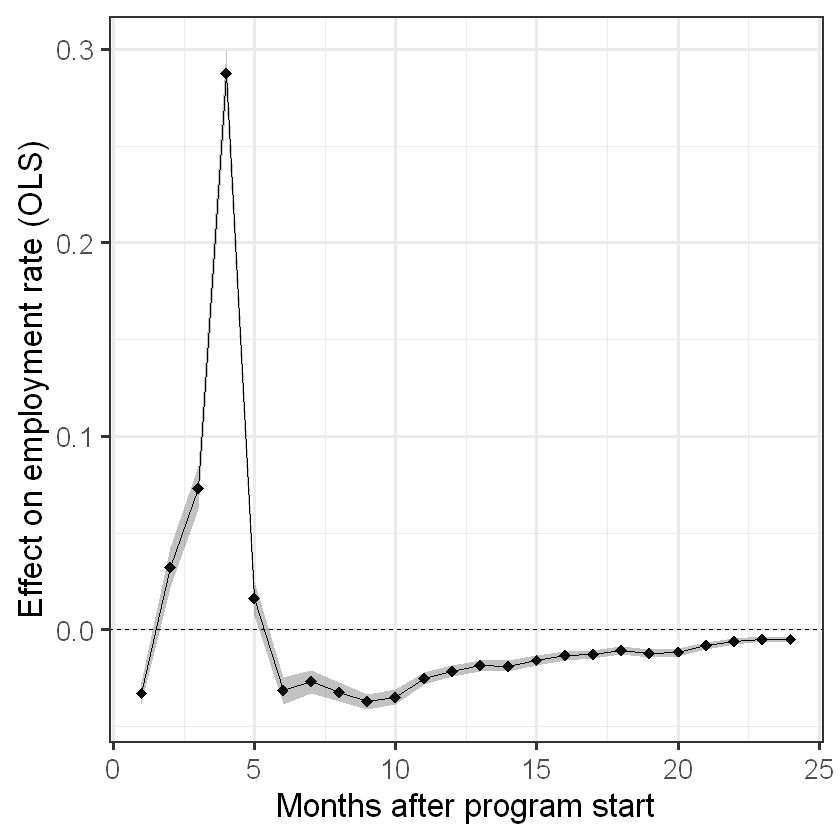

In [59]:
ggplot(reg_monthly_out2, aes(x = month, y = effect)) +
  geom_point(aes(x = month, y = sig), shape = 18, size  = 3) +
  geom_ribbon(aes(ymin  = cil, ymax  = cih), alpha=0.3) +
  geom_line() +
  theme_bw(base_size = 20) +
  xlab("Months after program start") +
  ylab("Effect on exit rate (OLS)") +
  geom_hline(yintercept = 0, linetype="dashed") 

What does this pattern suggest?

***

## References

Ferracci, M., Jolivet, G., & van den Berg, G. J. (2014). Evidence of treatment spillovers within markets. *Review of Economics and Statistics*, 96(5), 812-823.